# Chap 4. Training Models

In this chapter we will dive deeper into how models are trained. We will look at 
- Closed form solution to equation
- Iteration based solution to equation (Gradient Descent and its variations)

%%latex
## Linear regression

In linear regression we generally have an equation like the following :

`y = b0 + b1\*x1 + b2\*x2`

Where -
* y : The predicted value of the target
* b : Model parameters
* x : Input variable

In matrix form the equation can be written as:

`y = b^T.X`

Let us try to write our own Linear Regression model from scratch. We will generate some data and try to go through the steps to calculate the model.

We will use the normal equation solution to calculate the linear regression model

`theta = (XT.X)^(-1).XT.Y`

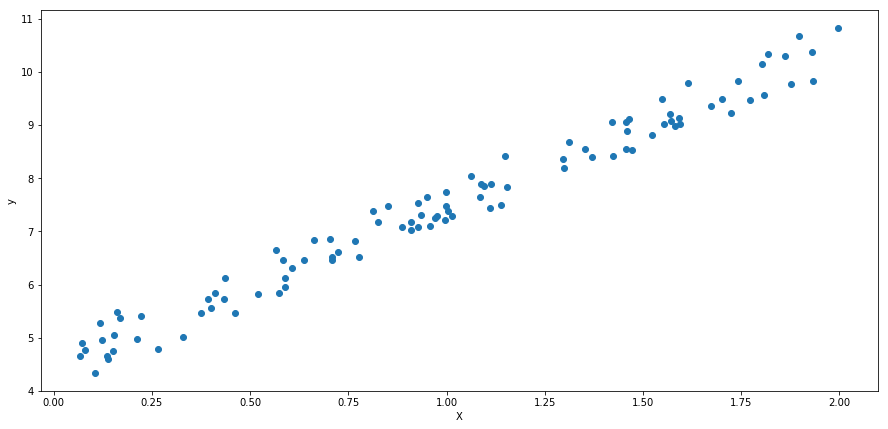

In [7]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [15, 7])
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Now let us calculate the normal equation for Linear Regression

In [10]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[ 4.4866439 ],
       [ 2.98953564]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.4866439 ],
       [ 10.46571519]])

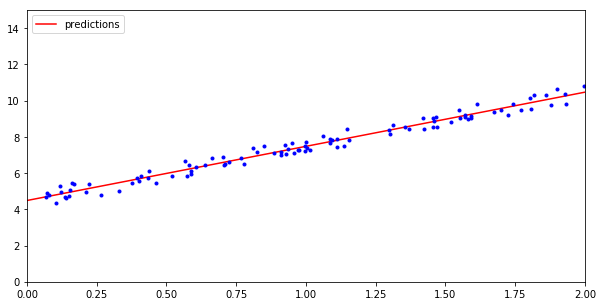

In [23]:
plt.figure(figsize=[10, 5])
plt.plot(X_new, y_predict, "r-", label = "predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc = "upper left")
plt.show()

In sklearn

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict(X_new)

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([[  4.4866439 ],
       [ 10.46571519]])

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.4866439]), array([[ 2.98953564]]))

### Gradient Descent

Now we will try to implement gradient descent algorithm for our problem and see if it can come up with the same solution as sklearn and also closed form solution of linear regression.

In [59]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [60]:
theta

array([[ 4.4866439 ],
       [ 2.98953564]])

This is the same as what we obtained from sklearn and our closed form solution of linear regression.

Now we will try and plot for the various learning rate values and see how our model converges.

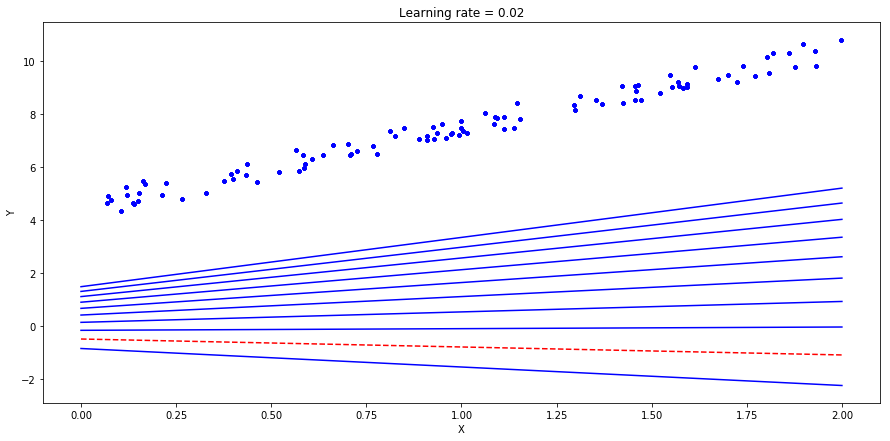

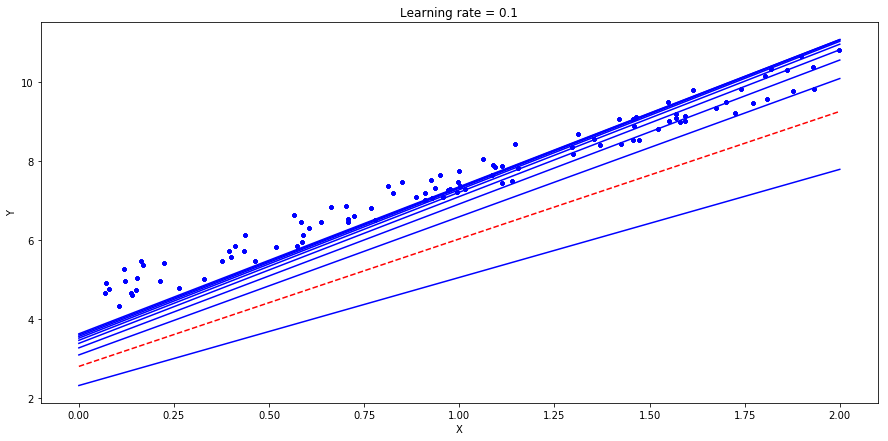

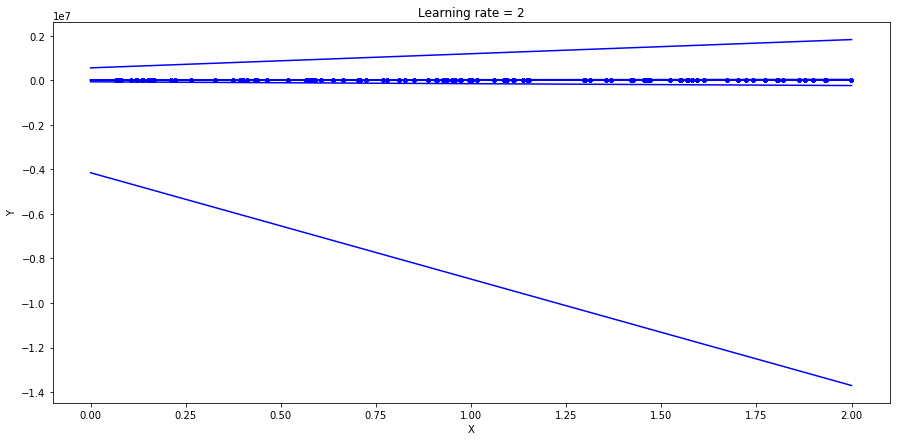

In [93]:
eta = [0.02, 0.1, 2]
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization

for learning_rate in eta:
    plt.figure(figsize=[15, 7])
    
    for iteration in range(n_iterations):
        gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

        y_predict = X_new_b.dot(theta)

        # Plot it 
        if iteration == 1:
            plt.plot(X_new, y_predict, "r--")
        else:
            plt.plot(X_new, y_predict, "b-")
        plt.plot(X, y, "b.")
        #plt.axis([0, 2, 0, 15])

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Learning rate = %s"%(learning_rate))
    plt.show()

As we can see that with higher learning rate the model starts to diverge while with lower learning rate, the model will take a lot of time to converge to the right answer.

### Stochastic Gradient Descent

Gradient descent uses the entire data to train and can be slow computationally. On the other hand stochastic gradient descent takes a random instance in the training data and tries to find the direction and gradient using that. This method is definitely faster as the method requires manipulating less amount of data each time, but the randomness in selecting the training data helps in allowing the model to NOT settle in local minimas, it keeps bouncing around and is not smoothly decreasing the error as in gradient descent.

One solution to this is to keep lowering the learning rate as the algorithm goes through the iteration. This reduces the bouncing of the algorithm around as the learning rate is lowered in the later stages of the process.